## Pre-processing and Training Data Development
This is the forth step in the Data Science Method. In this exercise, you will build the data inorder to fit models
**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  * Data Collection 
   * Data Organization
  * Data Definition 
  * Data Cleaning
  * Outliers
 
3.   Exploratory Data Analysis 
 * Build data profile tables and plots
        - Outliers & Anomalies
 * Explore data relationships
 * Identification and creation of features

4.   Pre-processing and Training Data Development
  * Create dummy or indicator features for categorical variables
  * Standardize the magnitude of numeric features
  * Split into testing and training datasets
  * Apply scaler to the testing set
5.   **Modeling**
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   Documentation
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

In [1]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import category_encoders as ce
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split

%matplotlib inline

### Load clean data from previous step

Also check data type and sync it based on analysis on previous step

<img src = 'Data_desc.png'>

<img src = 'Data_desc_cat.png'>

In [2]:
path = 'C:/Users/sanja/Jupyter Code/Git Hub/Online-Shopper-Intention-Capstone/'
filename = 'data/clean_data2.csv'
df = pd.read_csv(path+filename)
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,-1.0,0,-1.0,1,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
#DataFrame dtype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11233 entries, 0 to 11232
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           11233 non-null  int64  
 1   Administrative_Duration  11233 non-null  float64
 2   Informational            11233 non-null  int64  
 3   Informational_Duration   11233 non-null  float64
 4   ProductRelated           11233 non-null  int64  
 5   ProductRelated_Duration  11233 non-null  float64
 6   BounceRates              11233 non-null  float64
 7   ExitRates                11233 non-null  float64
 8   PageValues               11233 non-null  float64
 9   SpecialDay               11233 non-null  float64
 10  Month                    11233 non-null  object 
 11  OperatingSystems         11233 non-null  int64  
 12  Browser                  11233 non-null  int64  
 13  Region                   11233 non-null  int64  
 14  TrafficType           

## Dealing with Categorical Variables

In [4]:
cat_name = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType','VisitorType']
print(cat_name)

['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType']


In [5]:
for i in cat_name:
    print(i, df[i].nunique())
    print(df[i].value_counts())

Month 10
May     3166
Nov     2524
Mar     1790
Dec     1597
Oct      507
Sep      412
Jul      398
Aug      398
June     262
Feb      179
Name: Month, dtype: int64
OperatingSystems 8
2    5849
1    2453
3    2389
4     439
8      73
6      18
7       6
5       6
Name: OperatingSystems, dtype: int64
Browser 13
2     7139
1     2323
4      679
5      429
6      166
10     145
8      133
3      104
13      54
7       44
12      10
11       6
9        1
Name: Browser, dtype: int64
Region 9
1    4280
3    2200
4    1090
2    1047
6     747
7     708
9     470
8     401
5     290
Name: Region, dtype: int64
TrafficType 20
2     3493
1     2160
3     1921
4     1020
13     660
6      413
10     413
8      321
5      251
11     239
20     187
9       40
7       38
15      35
19      16
14      11
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64
VisitorType 3
Returning_Visitor    9481
New_Visitor          1674
Other                  78
Name: VisitorType, dtype: int64


In [6]:
#One hot encoding
df_enc = df.copy()

for col in cat_name:
    df_enc = pd.concat([df_enc.drop(col, axis = 1),pd.get_dummies(df_enc[col],prefix = col)],axis = 1)

print(df_enc.columns)

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Weekend',
       'Revenue', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep', 'OperatingSystems_1', 'OperatingSystems_2',
       'OperatingSystems_3', 'OperatingSystems_4', 'OperatingSystems_5',
       'OperatingSystems_6', 'OperatingSystems_7', 'OperatingSystems_8',
       'Browser_1', 'Browser_2', 'Browser_3', 'Browser_4', 'Browser_5',
       'Browser_6', 'Browser_7', 'Browser_8', 'Browser_9', 'Browser_10',
       'Browser_11', 'Browser_12', 'Browser_13', 'Region_1', 'Region_2',
       'Region_3', 'Region_4', 'Region_5', 'Region_6', 'Region_7', 'Region_8',
       'Region_9', 'TrafficType_1', 'TrafficType_2', 'TrafficType_3',
       'TrafficType_4', 'TrafficType_5', 'TrafficType_6', '

## Dealing with Non - Categorical Variables

In [7]:
df_enc.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
count,11233.000000,11233.000000,11233.000000,11233.000000,11233.000000,11233.000000,11233.000000,11233.000000,11233.000000,11233.000000,...,11233.000000,11233.000000,11233.000000,11233.000000,11233.000000,11233.000000,11233.000000,11233.000000,11233.000000,11233.000000
mean,2.046025,70.460222,0.396421,25.018867,23.305795,796.561459,0.021643,0.043278,5.846268,0.063402,...,0.000979,0.003116,0.000267,0.000089,0.000890,0.001424,0.016647,0.149025,0.006944,0.844031
std,2.949437,152.068255,1.044749,111.308646,23.061285,796.265484,0.047070,0.047630,18.724162,0.201350,...,0.031279,0.055735,0.016341,0.009435,0.029825,0.037716,0.127952,0.356129,0.083044,0.362842
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,169.966667,0.000000,0.014286,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,3.000000,0.000000,0.000000,16.000000,528.196429,0.002222,0.026449,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,82.850000,0.000000,0.000000,32.000000,1202.750000,0.017857,0.050000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,21.000000,2156.166667,10.000000,2252.033333,179.000000,3401.300000,0.200000,0.200000,361.763742,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
non_cat_name = ['Administrative', 'Administrative_Duration', 'Informational','Informational_Duration', 'ProductRelated', 
                'ProductRelated_Duration','BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

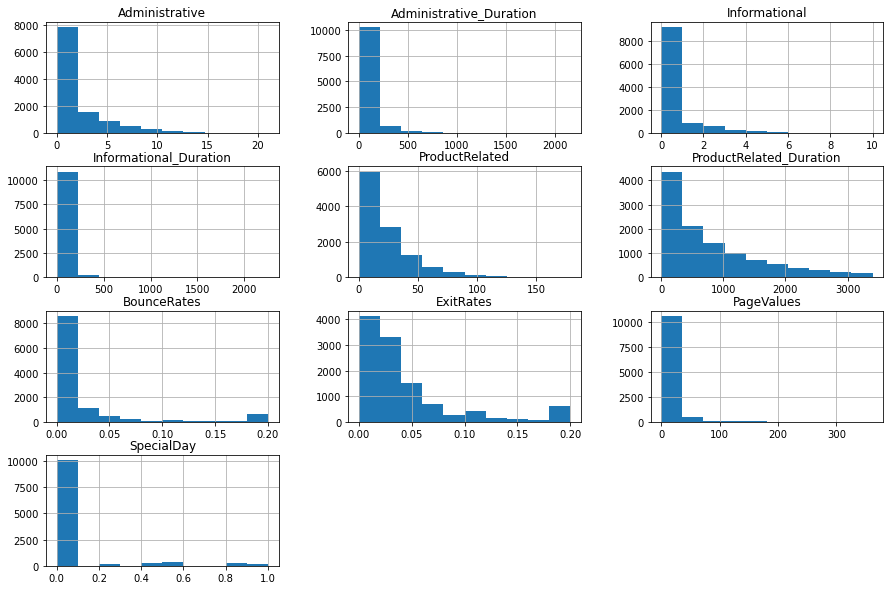

In [9]:
df_enc[non_cat_name].hist(figsize = (15,10))
plt.show()

## Standardization

In [10]:
scaler = StandardScaler()
df_enc[non_cat_name] = scaler.fit_transform(df_enc[non_cat_name])

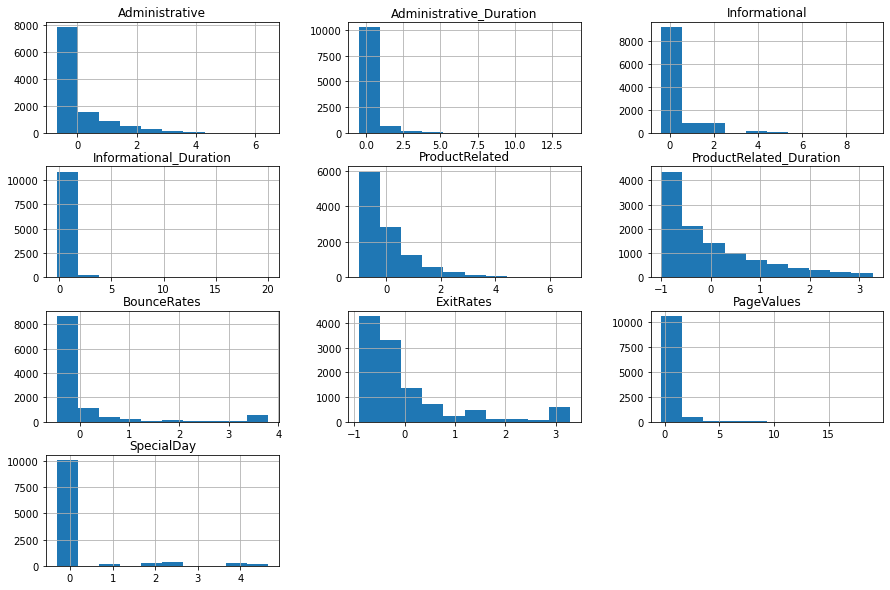

In [11]:
df_enc[non_cat_name].hist(figsize = (15,10))
plt.show()

## Modelling
This is the fifth step in the Data Science Method. In this exercise, build models
**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  * Data Collection 
   * Data Organization
  * Data Definition 
  * Data Cleaning
  * Outliers
 
3.   Exploratory Data Analysis 
 * Build data profile tables and plots
        - Outliers & Anomalies
 * Explore data relationships
 * Identification and creation of features

4.   Pre-processing and Training Data Development
  * Create dummy or indicator features for categorical variables
  * Standardize the magnitude of numeric features
  * Split into testing and training datasets
  * Apply scaler to the testing set
5.  **Modeling**
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   Documentation
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

## Statistical Test -- Feature Selection

In [12]:
#ANOVA Test
from sklearn import feature_selection

feature_sel =  pd.DataFrame()
feature_sel['Feature Name'] = non_cat_name
feature_sel['f_score'] = feature_selection.f_classif(df[non_cat_name],df['Revenue'])[0]
feature_sel['p-value'] = feature_selection.f_classif(df[non_cat_name],df['Revenue'])[1]

In [13]:
# Chi Square Test
from scipy.stats import chi2_contingency
#Testing the relationship
for i in cat_name:
    chi_res = chi2_contingency(pd.crosstab(df[i], df['Revenue']))
    #print('Chi2 Statistic for {}: {}, p-value: {}'.format(i,chi_res[0], chi_res[1]))
    feature_sel = feature_sel.append({'Feature Name': i,'f_score':chi_res[0],'p-value':chi_res[1]}, ignore_index=True)

In [14]:
feature_sel[feature_sel['p-value']>0.05]

,Feature Name,f_score,p-value
13,Region,5.261183,0.729331


In [15]:
#Features sans Region
selected_features = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Weekend',
       'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep', 'OperatingSystems_1', 'OperatingSystems_2',
       'OperatingSystems_3', 'OperatingSystems_4', 'OperatingSystems_5',
       'OperatingSystems_6', 'OperatingSystems_7', 'OperatingSystems_8',
       'Browser_1', 'Browser_2', 'Browser_3', 'Browser_4', 'Browser_5',
       'Browser_6', 'Browser_7', 'Browser_8', 'Browser_9', 'Browser_10',
       'Browser_11', 'Browser_12', 'Browser_13','TrafficType_1', 'TrafficType_2', 'TrafficType_3',
       'TrafficType_4', 'TrafficType_5', 'TrafficType_6', 'TrafficType_7',
       'TrafficType_8', 'TrafficType_9', 'TrafficType_10', 'TrafficType_11',
       'TrafficType_12', 'TrafficType_13', 'TrafficType_14', 'TrafficType_15',
       'TrafficType_16', 'TrafficType_17', 'TrafficType_18', 'TrafficType_19',
       'TrafficType_20', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor']

## Creating Train and Validation set

In [16]:
X = df_enc.drop(['Revenue'],axis=1)
y = df_enc['Revenue']

X_ss, X_val, y_ss, y_val  = train_test_split(X, y, test_size=0.15, random_state=43,shuffle = True)
X_train, X_test, y_train, y_test  = train_test_split(X_ss, y_ss, test_size=0.15, random_state=43,shuffle = True)

In [17]:
ss_index = X_ss.index
train_index = X_train.index
test_index = X_test.index
val_index = X_val.index

In [18]:
y_ss = y_ss.ravel()
X_ss = X_ss.reset_index().drop('index',axis = 1)

y_train = y_train.ravel()
X_train = X_train.reset_index().drop('index',axis = 1)

y_test = y_test.ravel()
X_test = X_test.reset_index().drop('index',axis = 1)

X_train_fs = X_train[selected_features]
X_test_fs = X_test[selected_features]
X_fs = X_ss[selected_features]

## Modeling

Methods used to deal with imbalance in data set:

1. Adding class-weight
2. Under Samoling using RandomSampling
3. Over Sampling using SMOTE

Tried all this methods to pick optimal model

In [19]:
from imblearn.under_sampling import RandomUnderSampler 
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from statistics import *

rus = RandomUnderSampler(random_state=42)
sm = SMOTE(random_state=27, sampling_strategy=1.0)


def cross_val(model,X,y,flag = 0):
    ''' Normal, flag = 0, Undersampling, flag = -1, Oversampling, flag = 1''' 
    
    f1_scr = []
    
    skf = StratifiedKFold(n_splits=5, random_state=None,shuffle = True)
    for train, test in skf.split(X,y): ## you must do this on full dataset 
        X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3, random_state=43,shuffle = True)

        if flag == -1: #Undersampling
            X_tr, y_tr = rus.fit_resample(X_train, y_train)

        elif flag == 1: #Oversampling
            X_tr, y_tr = sm.fit_resample(X_train, y_train)

        else:
            X_tr = X_train
            y_tr = y_train

        model.fit(X_tr, y_tr)
        y_pred = model.predict(X_test)
        f1 = f1_score(y_test, y_pred)
        f1_scr.append(f1)
    print('F1 Score',mean(f1_scr))
                    
    return model

In [20]:
from sklearn.utils.class_weight import compute_class_weight
weights = compute_class_weight('balanced', np.unique(y_ss), y_ss)
print(np.unique(y_ss),weights)

[False  True] [0.58354724 3.49231895]


C:\Users\sanja\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[False  True], y=[False False False ... False False False] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [21]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter = 1000,class_weight={True:3.5,False:0.6})
print('Normal')
logreg_nfs = cross_val(logreg,X_ss.drop('BounceRates',axis = 1),y_ss,0)
logreg_fs = cross_val(logreg,X_fs.drop('BounceRates',axis = 1),y_ss,0)

logreg = LogisticRegression(max_iter = 1000)
print('Under Sample')
logreg_nfs_ds = cross_val(logreg,X_ss.drop('BounceRates',axis = 1),y_ss,-1)
logreg_fs_ds = cross_val(logreg,X_fs.drop('BounceRates',axis = 1),y_ss,-1)
print('Over Sample')
logreg_nfs_us = cross_val(logreg,X_ss.drop('BounceRates',axis = 1),y_ss,1)
logreg_fs_us = cross_val(logreg,X_fs.drop('BounceRates',axis = 1),y_ss,1)

Normal
F1 Score 0.6337209302325582
F1 Score 0.6425073457394711
Under Sample
F1 Score 0.6279733587059942
F1 Score 0.6401551891367604
Over Sample
F1 Score 0.5951359084406296
F1 Score 0.6386333771353483


In [22]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(class_weight={True:3.5,False:0.6})
print('Normal')
clf_nfs = cross_val(clf,X_ss,y_ss,0)
clf_fs = cross_val(clf,X_fs,y_ss,0)

clf = tree.DecisionTreeClassifier()
print('Under Sample')
clf_nfs_ds = cross_val(clf,X_ss,y_ss,-1)
clf_fs_ds = cross_val(clf,X_fs,y_ss,-1)
print('Over Sample')
clf_nfs_us = cross_val(clf,X_ss,y_ss,1)
clf_fs_us = cross_val(clf,X_fs,y_ss,1)

Normal
F1 Score 0.5593867183230494
F1 Score 0.5595630224849263
Under Sample
F1 Score 0.5326133890653902
F1 Score 0.5366562588368701
Over Sample
F1 Score 0.5823343550532643
F1 Score 0.5629105697934688


In [23]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(class_weight={True:3.6,False:0.6})
print('Normal')
rfc_nfs = cross_val(rfc,X_ss,y_ss,0)
rfc_fs = cross_val(rfc,X_fs,y_ss,0)

rfc = RandomForestClassifier()
print('Under Sample')
rfc_nfs_ds = cross_val(rfc,X_ss,y_ss,-1)
rfc_fs_ds = cross_val(rfc,X_fs,y_ss,-1)
print('Over Sample')
rfc_nfs_us = cross_val(rfc,X_ss,y_ss,1)
rfc_fs_us = cross_val(rfc,X_fs,y_ss,1)

Normal
F1 Score 0.6361280452144208
F1 Score 0.6444995848352006
Under Sample
F1 Score 0.6524248341404251
F1 Score 0.6509247366346895
Over Sample
F1 Score 0.6905989862083851
F1 Score 0.6932057413318412


In [24]:
from xgboost import XGBClassifier

gbc = XGBClassifier(scale_pos_weight=17)
print('Normal')
gbc_nfs = cross_val(gbc,X_ss,y_ss,0)
gbc_fs = cross_val(gbc,X_fs,y_ss,0)

gbc = XGBClassifier()
print('Under Sample')
gbc_nfs_ds = cross_val(gbc,X_ss,y_ss,-1)
gbc_fs_ds = cross_val(gbc,X_fs,y_ss,-1)
print('Over Sample')
gbc_nfs_us = cross_val(gbc,X_ss,y_ss,1)
gbc_fs_us = cross_val(gbc,X_fs,y_ss,1)

Normal
F1 Score 0.6532343584305409
F1 Score 0.6624605678233438
Under Sample
F1 Score 0.6317657497781721
F1 Score 0.621172353455818
Over Sample
F1 Score 0.6503667481662591
F1 Score 0.6784037558685446


In [25]:
from sklearn.svm import SVC

svc = SVC(class_weight={True:3.5,False:0.6})
print('Normal')
svc_nfs = cross_val(svc,X_ss,y_ss,0)
svc_fs = cross_val(svc,X_fs,y_ss,0)

svc = SVC()
print('Under Sample')
svc_nfs_ds = cross_val(svc,X_ss,y_ss,-1)
svc_fs_ds = cross_val(svc,X_fs,y_ss,-1)
print('Over Sample')
svc_nfs_us = cross_val(svc,X_ss,y_ss,1)
svc_fs_us = cross_val(svc,X_fs,y_ss,1)

Normal
F1 Score 0.6534446764091858
F1 Score 0.652892561983471
Under Sample
F1 Score 0.6350148367952522
F1 Score 0.6286836935166994
Over Sample
F1 Score 0.6590621039290241
F1 Score 0.6713615023474179


UnderSampling hasn't improved model performance.

RandomForest performs well with oversampling using SMOTE.

XGBoost with oversampling using SMOTE looks promising.

In [26]:
def plot_features(model,feature_list = X_ss.columns):
    feature_importance = pd.DataFrame()
    feature_importance['Features'] = feature_list
    feature_importance['Feature_Importance'] = model.feature_importances_
    feature_importance.sort_values(by = 'Feature_Importance',ascending = False,inplace = True)
    feature_importance['Cumulative_Importances'] = np.cumsum(feature_importance['Feature_Importance'])

    plt.figure(figsize = [25,10])
    plt.bar(range(len(feature_list)), feature_importance['Feature_Importance'])
    nm = 'Feature Importance'
    plt.savefig(str(path+'figure/'+nm))
    plt.show()

    plt.figure(figsize = [25,10])
    plt.plot(feature_importance['Cumulative_Importances'].values, 'g-')
    plt.xticks(range(len(feature_importance['Features'])),feature_importance['Features'],rotation = 'vertical')
    plt.hlines(y = 0.95, xmin=0, xmax=len(feature_importance['Feature_Importance']), color = 'r', linestyles = 'dashed')
    nm = 'Cumilative Frequency'
    plt.savefig(str(path+'figure/'+nm))
    plt.show()
    
    return feature_importance

In [27]:
from sklearn import metrics

def pred(model,X,y):
    y_pred = model.predict(X)
    f1 = f1_score(y, y_pred)
    print(f1)
    print(metrics.confusion_matrix(y, y_pred))
    print(metrics.classification_report(y, y_pred))

#### Using Decision Tree for Feature Importance

F1 Score 0.5851682980468882


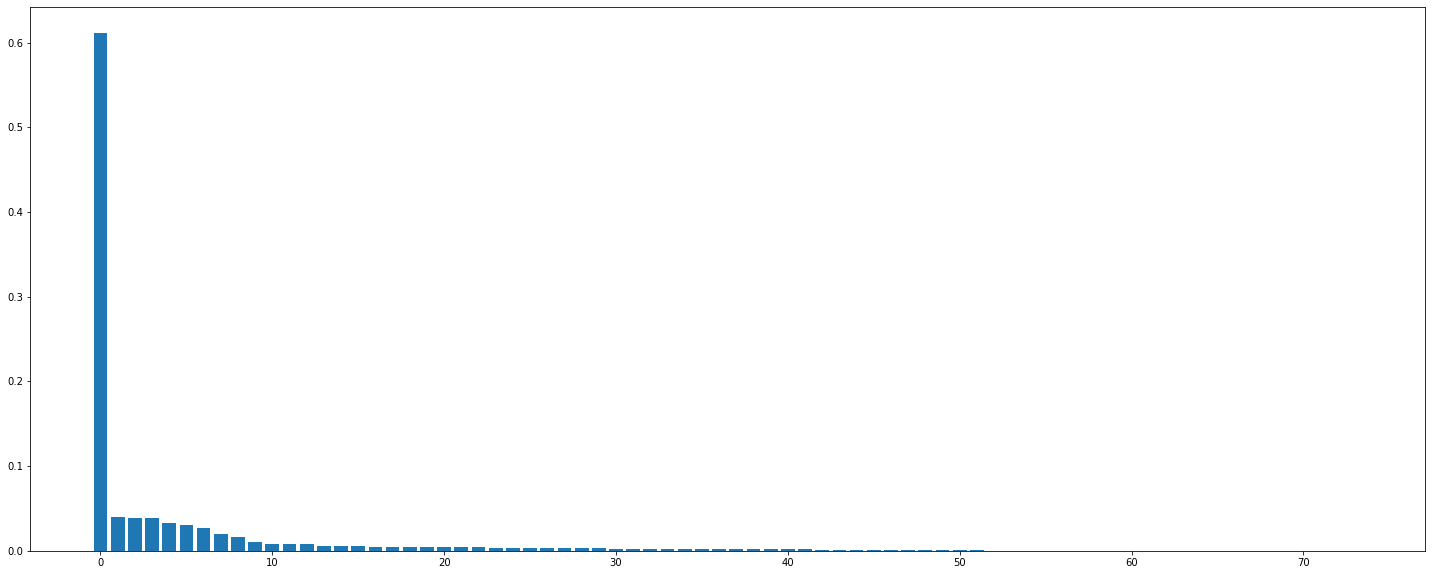

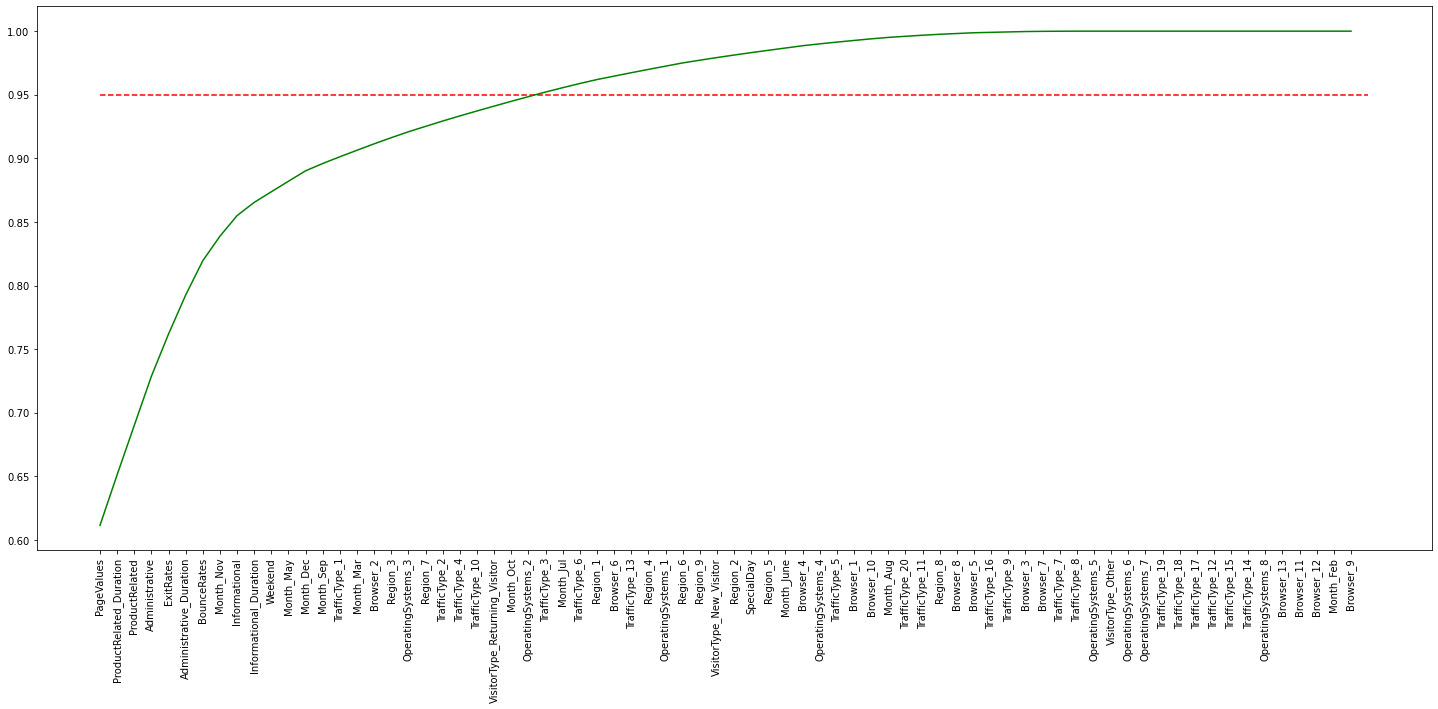

In [28]:
clf_nfs_us = cross_val(clf,X_ss,y_ss,1)
feature_importance = plot_features(clf_nfs_us)

In [29]:
feature_importance[feature_importance['Cumulative_Importances'] > 0.95]

,Features,Feature_Importance,Cumulative_Importances
53,TrafficType_3,0.003621,0.952141
14,Month_Jul,0.003412,0.955553
56,TrafficType_6,0.003304,0.958856
42,Region_1,0.003093,0.961949
34,Browser_6,0.002696,0.964645
63,TrafficType_13,0.002674,0.967319
45,Region_4,0.002615,0.969934
21,OperatingSystems_1,0.002549,0.972483
47,Region_6,0.002537,0.975020
50,Region_9,0.002143,0.977163


Updating features based on feature importance

In [30]:
df_new = df.copy()

#df_new.drop('Region',axis = 1,inplace = True)
for i in [4,2,6,9,5,8]:
    df_new['Region'].replace([i],[99],inplace = True)  

for i in [3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]:
    df_new['TrafficType'].replace([i],[99],inplace = True)  

for i in [1,4,5,8,6,7]:
    df_new['OperatingSystems'].replace([i],[99],inplace = True)
    
for i in [1,3,4,5,6,7,8,9,10,11,12,13]:
    df_new['Browser'].replace([i],[99],inplace = True)

In [31]:
cat_name_new = ['Month','OperatingSystems','TrafficType','Browser','VisitorType','Region']

for col in cat_name_new:
    df_new = pd.concat([df_new.drop(col, axis = 1),pd.get_dummies(df_new[col],prefix = col)],axis = 1)

In [32]:
X_fs_new = df_new.iloc[ss_index].drop(['Revenue'],axis=1)
y_fs_new = df_new.iloc[ss_index]['Revenue']

X_train_fs_new = df_new.iloc[train_index].drop(['Revenue'],axis=1)
y_train_fs_new = df_new.iloc[train_index]['Revenue']

X_test_fs_new = df_new.iloc[test_index].drop(['Revenue'],axis=1)
y_test_fs_new = df_new.iloc[test_index]['Revenue']

X_val_new = df_new.iloc[val_index].drop(['Revenue'],axis=1)
y_val_new = df_new.iloc[val_index]['Revenue']

y_fs_new = y_fs_new.ravel()
X_fs_new = X_fs_new.reset_index().drop('index',axis = 1)

y_train_fs_new = y_train_fs_new.ravel()
X_train_fs_new = X_train_fs_new.reset_index().drop('index',axis = 1)

y_test_fs_new = y_test_fs_new.ravel()
X_test_fs_new = X_test_fs_new.reset_index().drop('index',axis = 1)

y_val_new = y_val_new.ravel()
X_val_new = X_val_new.reset_index().drop('index',axis = 1)

F1 Score 0.702878468396688


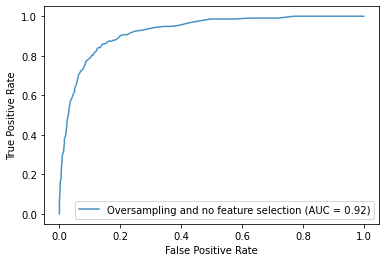

In [33]:
from sklearn.metrics import plot_roc_curve

#Random Forest -- with oversampling and no feature selection
rfc_nfs_us_1 = cross_val(rfc,X_train, y_train,1)
#feature_importance = plot_features(rfc_nfs_us_1,X_test.columns)

ax = plt.gca()
rfc_disp_1 = plot_roc_curve(rfc_nfs_us_1, X_test, y_test, ax=ax, alpha=0.8,name = 'Oversampling and no feature selection')

F1 Score 0.7128798897447788


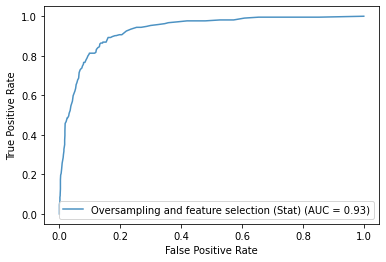

In [34]:
#Random Forest -- with oversampling and feature selection (Stat)

rfc_nfs_us_2 = cross_val(rfc,X_train_fs,y_train,1)
#feature_importance = plot_features(rfc_nfs_us_2,X_test_fs.columns)

ax = plt.gca()
rfc_disp_2 = plot_roc_curve(rfc_nfs_us_2, X_test_fs, y_test, ax=ax, alpha=0.8,name = 'Oversampling and feature selection (Stat)')

F1 Score 0.687712743050224


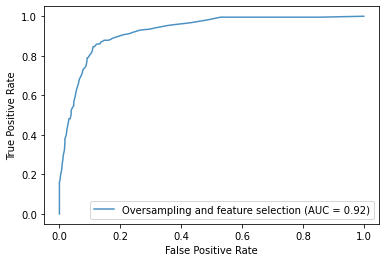

In [35]:
#Random Forest -- with oversampling and feature selection

rfc_nfs_us_3 = cross_val(rfc,X_train_fs_new,y_train_fs_new,1)
#feature_importance = plot_features(rfc_nfs_us_3,X_test_fs_new.columns)

ax = plt.gca()
rfc_disp_3 = plot_roc_curve(rfc_nfs_us_3, X_test_fs_new,y_test_fs_new, ax=ax, alpha=0.8, name = 'Oversampling and feature selection')

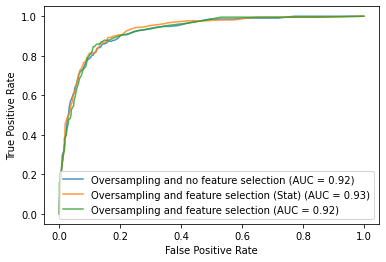

In [36]:
from sklearn.metrics import plot_roc_curve

ax = plt.gca()
rfc_disp_1.plot(ax=ax, alpha=0.8)
rfc_disp_2.plot(ax=ax, alpha=0.8)
rfc_disp_3.plot(ax=ax, alpha=0.8)
plt.show()

In [37]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 10, num = 3)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 6, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [38]:
#RandomForest hyperparameter tuning with oversampling and feature selection (Stat)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rfc = RandomForestClassifier()
X_tr, y_tr = sm.fit_resample(X_ss[selected_features], y_ss)

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random_fs = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1, scoring = 'f1')
# Fit the random search model
rf_random_fs.fit(X_tr, y_tr)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 16.3min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 6, 10, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 288, 377, 466,
                                                         555, 644, 733, 822,
                                                         911, 1000]},
                   random_state=42, scoring='f1', verbose=2)

In [39]:
rf_random_fs.best_params_

{'n_estimators': 466,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': False}

In [40]:
pred(rf_random_fs,X_val[selected_features],y_val)

0.7111111111111111
[[1366   71]
 [  72  176]]
              precision    recall  f1-score   support

       False       0.95      0.95      0.95      1437
        True       0.71      0.71      0.71       248

    accuracy                           0.92      1685
   macro avg       0.83      0.83      0.83      1685
weighted avg       0.91      0.92      0.92      1685



In [41]:
#RandomForest hyperparameter tuning with feature selection

rfc = RandomForestClassifier()
X_tr, y_tr = sm.fit_resample(X_fs_new, y_ss)

rf_random_fs_new = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1, scoring = 'f1')
rf_random_fs_new.fit(X_tr, y_tr)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 15.7min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 6, 10, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 288, 377, 466,
                                                         555, 644, 733, 822,
                                                         911, 1000]},
                   random_state=42, scoring='f1', verbose=2)

In [42]:
rf_random_fs_new.best_params_

{'n_estimators': 288,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

In [43]:
pred(rf_random_fs_new,X_val_new,y_val_new)

0.7203219315895372
[[1367   70]
 [  69  179]]
              precision    recall  f1-score   support

       False       0.95      0.95      0.95      1437
        True       0.72      0.72      0.72       248

    accuracy                           0.92      1685
   macro avg       0.84      0.84      0.84      1685
weighted avg       0.92      0.92      0.92      1685



In [44]:
#RandomForest hyperparameter tuning without feature selection

rfc = RandomForestClassifier()
X_tr, y_tr = sm.fit_resample(X_ss, y_ss)

rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1, scoring = 'f1')
rf_random.fit(X_tr, y_tr)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 14.2min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 6, 10, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 288, 377, 466,
                                                         555, 644, 733, 822,
                                                         911, 1000]},
                   random_state=42, scoring='f1', verbose=2)

In [45]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': False}

In [46]:
pred(rf_random,X_val,y_val)

0.7068273092369478
[[1363   74]
 [  72  176]]
              precision    recall  f1-score   support

       False       0.95      0.95      0.95      1437
        True       0.70      0.71      0.71       248

    accuracy                           0.91      1685
   macro avg       0.83      0.83      0.83      1685
weighted avg       0.91      0.91      0.91      1685



Random Forest, with Over-Sampling using SMOTE has the highest F1 score, and bucketing categories. 

* __PageValues__ has the highest feature importance, ie. the pages visited by customer the most, popular product pages.
* __Month:__ May, Nov, March, Dec, Sep and July, are key months. Something also observed in EDA step.
* __ProductRelated_Duration and ProductRelated__, combined have a greater importance in the model.
* __Administrative and Administrative_Duration__,have higher presdence over __Informational and Informational_Duration__.
* __Returning Visitor__ has higher importance than __New Visitor__, a loyalty program might boost sales.
* __Exit Rates__ and __Bounce Rates__ also, help determine visitor loyalty.